In [1]:
import skimage
import skimage.io
import matplotlib.pyplot as plt
import numpy as np
import skimage.viewer
import skimage.transform

url = "https://global-uploads.webflow.com/5a9d5f4fda615c00014ad29e/5bf2c4bf3466fdfafb66a820_Passport%203_cropped_p-p-2000.jpeg"
im = skimage.io.imread(url)
im.shape

C:\Users\Jon\Anaconda3\lib\site-packages\skimage\viewer\utils\core.py:10: UserWarning: Recommended matplotlib backend is `Agg` for full skimage.viewer functionality.
  warn("Recommended matplotlib backend is `Agg` for full "


(1000, 2000, 3)

Sample the points at the four corners. Lowercase will denote the coordinates on the image; uppercase will denote the coordinates on the target (i.e. the passport).

In [ ]:
viewer = skimage.viewer.ImageViewer(im)
viewer.show()

In [2]:
a = np.array([1177,740])
b = np.array([1901,479])
c = np.array([1332,5])
d = np.array([711,188])

# This is not the real aspect ratio for a passport
w,h = 1000,1500
A = np.array([0,h])
B = np.array([w,h])
C = np.array([w,0])
D = np.array([0,0])

tf = skimage.transform.estimate_transform("projective",
    src=np.vstack((a,b,c,d)),
    dst=np.vstack((A,B,C,D)))

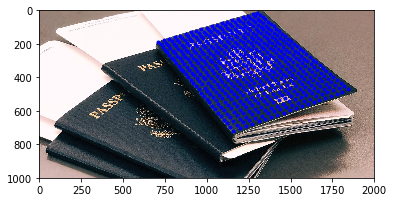

In [3]:
invtf = tf.inverse
plt.imshow(im)
for x in np.arange(0,w,50):
    for y in np.arange(0,h,50):
        p = invtf((x,y))
        plt.plot(p[0,0],p[0,1],'b.')

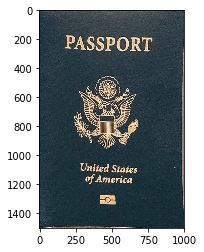

In [11]:
tim = skimage.transform.warp(image=im, inverse_map=invtf, output_shape=(1500,1000))
plt.imshow(tim)